# Implementation

This section demonstrates how to fit a regression model in Python in practice. The two most common packages for fitting regression models in Python are `scikit-learn` and `statsmodels`. Both methods are shown before. 

First, let's import the data and necessary packages. We'll again be using the {doc}`Boston housing </content/appendix/data>` dataset from `sklearn.datasets`. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
boston = datasets.load_boston()
X_train = boston['data']
y_train = boston['target']


## Scikit-Learn

Fitting the model in `scikit-learn` is very similar to how we fit our model from scratch in the previous section. The model is fit in two steps: first instantiate the model and second use the `fit()` method to train it.

In [3]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train);

As before, we can plot our fitted values against the true values. To form predictions with the `scikit-learn` model, we can use the `predict` method. Reassuringly, we get the same plot as before. 

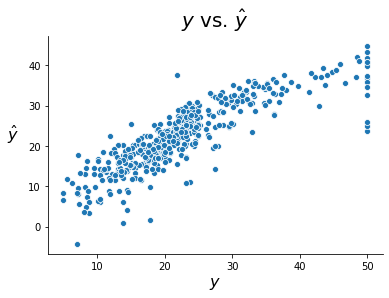

In [4]:
sklearn_predictions = sklearn_model.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(y_train, sklearn_predictions)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

We can also check the estimated parameters using the `coef_` attribute as follows (note that only the first few are printed).

In [5]:
predictors = boston.feature_names
beta_hats = sklearn_model.coef_
print('\n'.join([f'{predictors[i]}: {round(beta_hats[i], 3)}' for i in range(3)]))

CRIM: -0.108
ZN: 0.046
INDUS: 0.021


## Statsmodels

`statsmodels` is another package frequently used for running linear regression in Python. There are two ways to run regression in `statsmodels`. The first uses `numpy` arrays like we did in the previous section. An example is given below.

```{note}
Note two subtle differences between this model and the models we've previously built. First, we have to manually add a constant to the predictor dataframe in order to give our model an intercept term. Second, we supply the training data when *instantiating* the model, rather than when fitting it. 
```

In [6]:
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(X_train)
sm_model1 = sm.OLS(y_train, X_train_with_constant)
sm_fit1 = sm_model1.fit()
sm_predictions1 = sm_fit1.predict(X_train_with_constant)

The second way to run regression in `statsmodels` is with `R`-style formulas and `pandas` dataframes. This allows us to identify predictors and target variables by name. An example is given below.

In [7]:
import pandas as pd
df = pd.DataFrame(X_train, columns = boston['feature_names'])
df['target'] = y_train
display(df.head())

formula = 'target ~ ' + ' + '.join(boston['feature_names'])
print('formula:', formula)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


formula: target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT


In [8]:
import statsmodels.formula.api as smf

sm_model2 = smf.ols(formula, data = df)
sm_fit2 = sm_model2.fit()
sm_predictions2 = sm_fit2.predict(df)